# Module 3: Classification (Churn Prediction)

## Section 1: Understanding the problem:

Churn is the identifier for whether a customer for company 1 has switched to a competitor company 2

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


--2025-05-21 16:31:47--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 954.59K  --.-KB/s    in 0.009s  

2025-05-21 16:31:47 (106 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('telcom_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Section 2: Data Preparation

In [5]:

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.head(8).T

,0,1,2,3,4,5,6,7
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC
gender,Female,Male,Male,Male,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes,No
tenure,1,34,2,45,2,8,22,10
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes


In [7]:
## Clean the data up
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

## Let's look at the data again

df.head(8).T

,0,1,2,3,4,5,6,7
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc
gender,female,male,male,male,female,female,male,female
seniorcitizen,0,0,0,0,0,0,0,0
partner,yes,no,no,no,no,no,no,no
dependents,no,no,no,no,no,no,yes,no
tenure,1,34,2,45,2,8,22,10
phoneservice,no,yes,yes,no,yes,yes,yes,no
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl
onlinesecurity,no,yes,yes,yes,no,no,no,yes


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [11]:
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [13]:
df.total_charges = df.totalcharges.fillna(0)

/tmp/ipykernel_2098/1609665531.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.total_charges = df.totalcharges.fillna(0)


In [14]:

df.totalcharges.isnull().sum()

np.int64(0)

In [15]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [16]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [17]:
df.churn = (df.churn == 'yes').astype(int)

In [18]:
df.churn.head(7)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
Name: churn, dtype: int64

In [19]:
df.churn.isnull().sum()

np.int64(0)

In [20]:
len(df.churn)

7043

In [21]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,1


## Section 3: Setting up the Validation Framework

** Perform the train/validation/test split with Scikit-learn

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [214]:
full_train, test = train_test_split(df, test_size= 0.2, random_state=1)
train, val = train_test_split(full_train, test_size = 0.25, random_state = 1)


In [215]:
len(train), len(val), len(full_train), len(test)

(4225, 1409, 5634, 1409)

In [216]:

train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.1,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.5,0


In [217]:
train = train.reset_index(drop = True)
val = val.reset_index(drop = True)
test = test.reset_index(drop = True)



In [218]:
# Extracting the target values, that is the churn values

y_train = train.churn.values
y_val = val.churn.values
y_test = test.churn.values

del train['churn']
del val['churn']
del test['churn']



In [29]:
train.head().T

,0,1,2,3,4
customerid,8015-ihcgw,1960-uycnn,9250-wypll,6786-obwqr,1328-euzhc
gender,female,male,female,female,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,yes,yes
dependents,yes,no,no,yes,no
tenure,72,10,5,5,18
phoneservice,yes,yes,yes,yes,yes
multiplelines,yes,yes,yes,no,no
internetservice,fiber_optic,fiber_optic,fiber_optic,fiber_optic,no
onlinesecurity,yes,no,no,no,no_internet_service


In [30]:
train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.1
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.8
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


## Section 4: Exploratory Data Analysis

 -  Check missing values
 -  Look at the target variable (churn)
 - look at the numerical and categorical variables

We use the fulltrain data frame to do this exploratory analysis

In [31]:
full_train.head().T

,1814,5946,3881,2389,3676
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


In [32]:
full_train = full_train.reset_index(drop =  True)

In [33]:
full_train.churn.value_counts(normalize = True) ## 

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

The churn rate for the current data set is 0.27

In [34]:
# We can do this as:
global_churn_rate = full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [35]:
full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [36]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [37]:
full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [174]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
        'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
        'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
        'paymentmethod']

In [39]:
full_train[categorical].nunique() # most categorical values are binary or tripartite in nature

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

<Axes: xlabel='churn', ylabel='Count'>

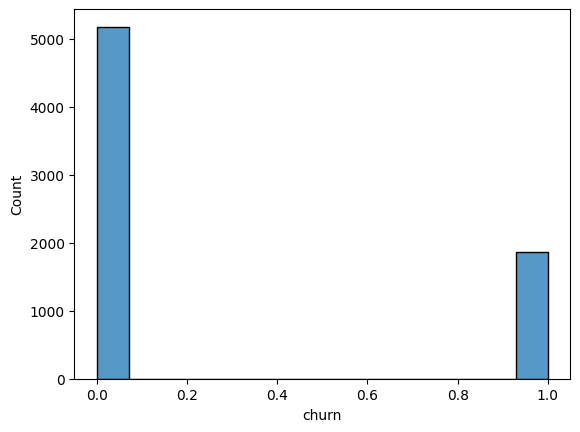

In [40]:
## Let's plot the distribution of the churn

sns.histplot(df.churn) # most of the customers didn't churn
# but this kind of distribution by itself doesn't help that much.

## Section 5: Feature Importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifiying which features our tarfet variable:
- Churn Rate
- Risk Ratio
- Mutual_information (later)

### Churn Rate

In [41]:
global_churn_rate

np.float64(0.26996805111821087)

In [43]:
churn_female = full_train[full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [44]:
churn_male = full_train[full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

The gender variable has no significant bearing on the churn rate as it is about the same as the global churn rate

In [46]:
full_train.partner

0       yes
1        no
2       yes
3       yes
4        no
       ... 
5629     no
5630     no
5631     no
5632     no
5633    yes
Name: partner, Length: 5634, dtype: object

In [48]:
full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [49]:
full_train.partner.isnull().sum()

np.int64(0)

In [51]:

churn_partner = full_train[full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [52]:
churn_no_partner = full_train[full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

We now that the churn rate differs from the global churn rate depending on whether you have a partner or not. This implies that the information of the partner features bears relevance to the churn variable

In [54]:
delta_churn = global_churn_rate  - churn_partner
delta_churn

np.float64(0.06493474245795922)

In [55]:
# 1 .Difference  = (global_rate) - (group)
# if difference < 0: group is more likely to churn
# if difference > 0; Group is less likely to churn

# 2. Risk Ration = group_rate/global_rate

# if risk ratio < 1: group is less likely to churn
# if risk ratio > 1: group is more likely to churn


SELECT 
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk

FROM 
    data

GROUP BY
    gender;

In [59]:
# In panda 

full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [60]:
# 
full_train.groupby('dependents').churn.agg(['mean', 'count'])


,mean,count
dependents,,
no,0.313760,3968
yes,0.165666,1666


In [61]:
df_group = full_train.groupby('gender').churn.agg(['mean', 'count'])

In [62]:
df_group['diff'] = df_group['mean'] - global_churn_rate


,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [63]:
from IPython.display import display

In [65]:
for c in categorical:
    print(c)
    df_group = full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean']/ global_churn_rate
    display(df_group)
    print()
    print()

customerid


,mean,count,diff,risk
customerid,,,,
0002-orfbo,0.0,1,-0.269968,0.000000
0004-tlhlj,1.0,1,0.730032,3.704142
0011-igkff,1.0,1,0.730032,3.704142
0013-exchz,1.0,1,0.730032,3.704142
0013-mhzwf,0.0,1,-0.269968,0.000000
...,...,...,...,...
9987-lutyd,0.0,1,-0.269968,0.000000
9992-rramn,1.0,1,0.730032,3.704142
9992-ujoel,0.0,1,-0.269968,0.000000




gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Section 6: Feature Importance: Mutual Information

The MI of two Random Variable is a measure of the mutual dependence between the two variables. 

In [66]:
from sklearn.metrics import mutual_info_score

In [67]:
mutual_info_score(full_train.churn, full_train.contract)

np.float64(0.0983203874041556)

In [68]:
mutual_info_score(full_train.churn, full_train.gender)


np.float64(0.0001174846211139946)

In [69]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, full_train.churn)

mi = full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

customerid          0.583227
contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

The higher the score in the mutual information, the more we can learn of the churn value from the selected features

## Section 7: Feature Importance: Correlation

Peason Correlation Coefficient 

The P_coeff of two variables X, Y \belongs to [-1,1] 


In [106]:
full_train[numerical].corrwith(full_train.churn)

ValueError: could not convert string to float: '_'

In [71]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [77]:
full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [86]:
full_train_2 = full_train.copy()

In [89]:
full_train_2[full_train_2.totalcharges == '_']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
899,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,0
2224,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,0
2697,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,0
3054,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,0
3488,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,...,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,_,0
4056,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,0
4761,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,0
5607,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,0


In [93]:
tc = pd.to_numeric(full_train_2.totalcharges, errors = 'coerce')

In [94]:
tc

0        258.35
1       3160.55
2       4681.75
3       6300.85
4       2044.75
         ...   
5629     918.60
5630    1189.90
5631    2979.50
5632     114.10
5633    1114.85
Name: totalcharges, Length: 5634, dtype: float64

In [97]:
tc.isnull().sum()

np.int64(8)

In [101]:
tc = tc.fillna(0)

In [102]:
tc.isnull().sum()

np.int64(0)

In [103]:
full_train_2.totalcharges = tc

In [104]:
full_train_2

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [105]:
full_train_2[full_train_2.totalcharges == '_']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [107]:
full_train_2[numerical].corrwith(full_train_2.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [108]:
full_train = full_train_2


In [ ]:
full_train[df]

## Section 8: One-Hot encoding

In [111]:
corr_matrix = full_train[numerical + ['churn']].corr()

<Axes: >

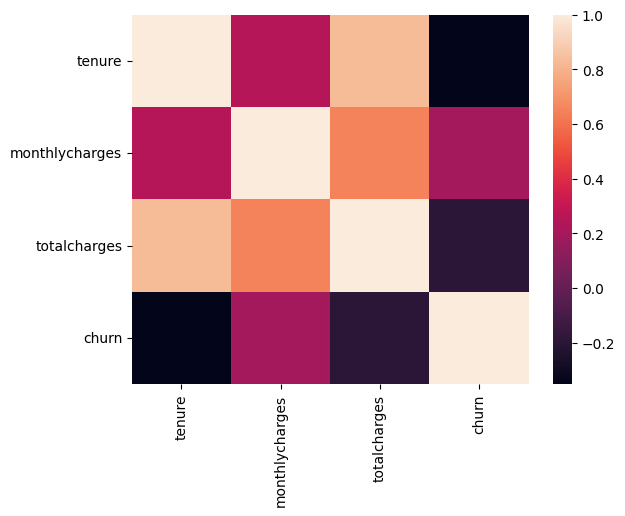

In [112]:
sns.heatmap(corr_matrix)

## Section 8: One Hot encoding
- Use Scikit-learn to encode categorical features

In [118]:
full_train_dum = full_train.copy()

In [123]:
unique_vals = full_train_dum.gender.unique()

In [124]:
unique_vals

array(['male', 'female'], dtype=object)

In [125]:
full_train_dum['male'] = (full_train_dum.gender == 'male').astype(int)

In [138]:
full_train_dum[['male', 'gender']]

,male,gender
0,1,male
1,0,female
2,1,male
3,1,male
4,1,male
...,...,...
5629,1,male
5630,1,male
5631,1,male
5632,1,male


In [ ]:
## Before using the scikit function, let's try to define a custom hot-encoder for pedagogical purposes

def one_hot_encoding(some_df, categorical):
    some_df = some_df.copy()
    for c in categorical:
        for unique_dim in some_df[c].unique():
            some_df[unique_dim] = (some_df[c] == unique_dim).astype(int)
    return some_df

full_train_dum = one_hot_encoding(full_train, ['gender', 'contract'])

In [145]:
full_train_dum[['gender', 'contract', 'male', 'female', 'month-to-month', 'two_year', 'one_year']].head()

,gender,contract,male,female,month-to-month,two_year,one_year
0,male,two_year,1,0,0,1,0
1,female,one_year,0,1,0,0,1
2,male,two_year,1,0,0,1,0
3,male,one_year,1,0,0,0,1
4,male,one_year,1,0,0,0,1


In [144]:
full_train.contract.unique()


array(['two_year', 'one_year', 'month-to-month'], dtype=object)

Okay, I have define a working one-hot-encoder, now let's move on to understand the sklearn implementation

In [146]:
from sklearn.feature_extraction import DictVectorizer

In [148]:
train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [149]:
train[['gender', 'contract']].iloc[:10].to_dict(orient = 'records')


[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [182]:

dicts = train[categorical].to_dict(orient = 'records') #orient records turns by row into dict

In [183]:
dicts[0]


{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check'}

In [184]:
dv = DictVectorizer(sparse = False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [187]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',
       'streaming

In [223]:
train.totalcharges = pd.to_numeric(train.totalcharges, errors = 'coerce')
val.totalcharges = pd.to_numeric(val.totalcharges, errors = 'coerce')
train.totalcharges.head()


0    8425.15
1    1021.55
2     413.65
3     356.10
4     370.50
Name: totalcharges, dtype: float64

In [219]:
train.totalcharges.isnull().sum()

np.int64(0)

In [224]:
train.totalcharges = train.totalcharges.fillna(0)
val.totalcharges = val.totalcharges.fillna(0)

In [203]:
train.totalcharges.isnull().sum()

np.int64(0)

In [190]:
X_cat = dv.transform(dicts)
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]], shape=(4225, 42))

In [204]:
X_num = train[numerical].values
X_num

array([[7.20000e+01, 1.15500e+02, 8.42515e+03],
       [1.00000e+01, 9.52500e+01, 1.02155e+03],
       [5.00000e+00, 7.55500e+01, 4.13650e+02],
       ...,
       [2.00000e+00, 9.00000e+01, 1.90050e+02],
       [2.70000e+01, 2.45000e+01, 7.61950e+02],
       [9.00000e+00, 8.08500e+01, 7.51650e+02]], shape=(4225, 3))

In [168]:
full_train_dum[['gender', 'contract', 'male', 'female', 'month-to-month', 'two_year', 'one_year']].head()

,gender,contract,male,female,month-to-month,two_year,one_year
0,male,two_year,1,0,0,1,0
1,female,one_year,0,1,0,0,1
2,male,two_year,1,0,0,1,0
3,male,one_year,1,0,0,0,1
4,male,one_year,1,0,0,0,1


In [169]:
# Let's compare with the output of the custom encoder we defined:
full_train_dum[['month-to-month', 'one_year', 'two_year', 'female', 'male']].values


array([[0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       ...,
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0]], shape=(5634, 5))

In [225]:
def prepare_full_X(some_df, categorial, numerical):
    from sklearn.feature_extraction import DictVectorizer

    #assume that the df has been treated well
    df_dicts = some_df[categorial].to_dict(orient = 'records')
    df_dv = DictVectorizer(sparse = False)
    X_cat = df_dv.fit_transform(df_dicts)

    ## X_numerical 
    X_num = some_df[numerical].values

    X_tot = np.column_stack([X_num, X_cat])
    return X_tot
    

In [226]:
train_X = prepare_full_X(train, categorical, numerical)
val_X = prepare_full_X(val, categorical, numerical)
train_X[:5]
val_X[:5]

array([[7.1000e+01, 7.0850e+01, 4.9734e+03, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0750e+01, 2.0750e+01, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0

## Section 9: Logistic Regression

- Binary Classification
- Linear vs Logistic Regression

In [227]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [228]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

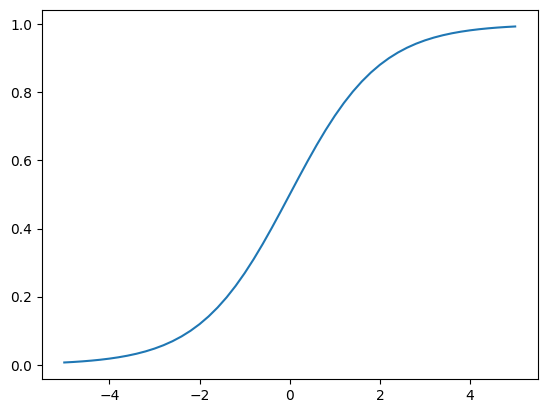

In [229]:
plt.plot(z, sigmoid(z))

In [231]:
def linear_model(X, w):
    return X.dot(w)

def logistic_regression(X, w):
    z = linear_model(X, w)
    return sigmoid(z)

## Section 10: Training logistic regression with Scikit Learn
- train a model with scikit-learn
- Apply it to the validation dataset
- Calculate the accuracy

In [232]:
from sklearn.linear_model import LogisticRegression


In [233]:
model = LogisticRegression()

In [235]:
train_X, y_train

(array([[7.20000e+01, 1.15500e+02, 8.42515e+03, ..., 0.00000e+00,
         0.00000e+00, 1.00000e+00],
        [1.00000e+01, 9.52500e+01, 1.02155e+03, ..., 1.00000e+00,
         0.00000e+00, 0.00000e+00],
        [5.00000e+00, 7.55500e+01, 4.13650e+02, ..., 1.00000e+00,
         0.00000e+00, 0.00000e+00],
        ...,
        [2.00000e+00, 9.00000e+01, 1.90050e+02, ..., 0.00000e+00,
         0.00000e+00, 1.00000e+00],
        [2.70000e+01, 2.45000e+01, 7.61950e+02, ..., 0.00000e+00,
         1.00000e+00, 0.00000e+00],
        [9.00000e+00, 8.08500e+01, 7.51650e+02, ..., 1.00000e+00,
         0.00000e+00, 0.00000e+00]], shape=(4225, 45)),
 array([0, 0, 1, ..., 1, 0, 1], shape=(4225,)))

In [236]:
model.fit(train_X, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [239]:
model.coef_[0].round(3)

array([-0.07 ,  0.004,  0.   ,  0.474, -0.175, -0.407, -0.03 , -0.078,
        0.063, -0.089, -0.081, -0.034, -0.073, -0.335,  0.316, -0.089,
       -0.258,  0.141,  0.009,  0.063, -0.089, -0.081,  0.265, -0.089,
       -0.284, -0.231,  0.123, -0.166,  0.058, -0.087, -0.032,  0.07 ,
       -0.059,  0.141, -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071,
       -0.089,  0.052,  0.213, -0.089, -0.232])

In [243]:
(model.predict(train_X) != y_train).sum()

np.int64(822)

In [244]:
model.predict_proba(train_X)

array([[0.90430077, 0.09569923],
       [0.32090004, 0.67909996],
       [0.36653569, 0.63346431],
       ...,
       [0.46815006, 0.53184994],
       [0.95755818, 0.04244182],
       [0.3016033 , 0.6983967 ]], shape=(4225, 2))

In [248]:
y_pred_probs = model.predict_proba(val_X)[:,1]

In [249]:
churn_decision = (y_pred_probs >= 0.5)

In [250]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [ ]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_probs
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [252]:
df_pred

,probability,prediction,actual
0,0.009004,0,0
1,0.204316,0,0
2,0.211940,0,0
3,0.542939,1,1
4,0.213511,0,0
...,...,...,...
1404,0.313286,0,0
1405,0.039359,0,1
1406,0.136455,0,0
1407,0.799576,1,1


In [254]:
df_pred['correct'] = (df_pred.prediction == df_pred.actual).astype(int)

In [255]:
df_pred.head()

,probability,prediction,actual,correct
0,0.009004,0,0,1
1,0.204316,0,0,1
2,0.211940,0,0,1
3,0.542939,1,1,1
4,0.213511,0,0,1


## Section 11: Model Interpretation

- Look at the coeeficients
-  Train a smaller model with fewer features


In [259]:
weights  = model.coef_[0].round(3)
weights

array([-0.07 ,  0.004,  0.   ,  0.474, -0.175, -0.407, -0.03 , -0.078,
        0.063, -0.089, -0.081, -0.034, -0.073, -0.335,  0.316, -0.089,
       -0.258,  0.141,  0.009,  0.063, -0.089, -0.081,  0.265, -0.089,
       -0.284, -0.231,  0.123, -0.166,  0.058, -0.087, -0.032,  0.07 ,
       -0.059,  0.141, -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071,
       -0.089,  0.052,  0.213, -0.089, -0.232])

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',
       'streaming

In [274]:

dict(zip(numerical + dv.feature_names_, weights))

{'tenure': np.float64(-0.07),
 'monthlycharges': np.float64(0.004),
 'totalcharges': np.float64(0.0),
 'contract=month-to-month': np.float64(0.474),
 'contract=one_year': np.float64(-0.175),
 'contract=two_year': np.float64(-0.407),
 'dependents=no': np.float64(-0.03),
 'dependents=yes': np.float64(-0.078),
 'deviceprotection=no': np.float64(0.063),
 'deviceprotection=no_internet_service': np.float64(-0.089),
 'deviceprotection=yes': np.float64(-0.081),
 'gender=female': np.float64(-0.034),
 'gender=male': np.float64(-0.073),
 'internetservice=dsl': np.float64(-0.335),
 'internetservice=fiber_optic': np.float64(0.316),
 'internetservice=no': np.float64(-0.089),
 'multiplelines=no': np.float64(-0.258),
 'multiplelines=no_phone_service': np.float64(0.141),
 'multiplelines=yes': np.float64(0.009),
 'onlinebackup=no': np.float64(0.063),
 'onlinebackup=no_internet_service': np.float64(-0.089),
 'onlinebackup=yes': np.float64(-0.081),
 'onlinesecurity=no': np.float64(0.265),
 'onlinesecurity

In [264]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [269]:
numerical + dv.feature_names_

['tenure',
 'monthlycharges',
 'totalcharges',
 'contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'st